# Data Exploration for Amazon Review 2023

## Download

In [33]:
import requests
import gzip
import shutil
import os
from tqdm import tqdm


def download_and_extract_gz(url, category):
    """
    Download and extract .jsonl.gz files for specific categories.

    Parameters:
    - url (str): URL of the .jsonl.gz file to be downloaded.
    - category (str): Category folder where the files will be saved ("cd_and_vinyl" or "office_products").
    """
    # Define output folder
    output_folder = os.path.join("../data", category)
    os.makedirs(output_folder, exist_ok=True)

    # File paths
    gz_file_path = os.path.join(output_folder, os.path.basename(url))
    jsonl_file_path = gz_file_path.replace(".gz", "")

    # Check if file already exists
    if os.path.exists(jsonl_file_path):
        print(f"{jsonl_file_path} already exists. Skipping download.")
        return jsonl_file_path

    # Download file with tqdm progress bar
    print(f"Downloading {url} to {gz_file_path}...")
    response = requests.get(url, stream=True)
    total_size = int(response.headers.get("content-length", 0))

    with open(gz_file_path, "wb") as f:
        with tqdm(
            total=total_size, unit="B", unit_scale=True, desc=os.path.basename(url)
        ) as pbar:
            for data in response.iter_content(1024):
                f.write(data)
                pbar.update(len(data))

    print(f"Downloaded: {gz_file_path}")

    # Extract .gz file
    print(f"Extracting {gz_file_path}...")
    with gzip.open(gz_file_path, "rb") as f_in:
        with open(jsonl_file_path, "wb") as f_out:
            shutil.copyfileobj(f_in, f_out)
    print(f"Extracted: {jsonl_file_path}")

    # Optionally remove the .gz file
    os.remove(gz_file_path)
    print(f"Removed compressed file: {gz_file_path}")

    return jsonl_file_path


# URLs and categories
categories = {
    "cd_and_vinyl": [
        "https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_2023/raw/review_categories/CDs_and_Vinyl.jsonl.gz",
        "https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_2023/raw/meta_categories/meta_CDs_and_Vinyl.jsonl.gz",
    ],
    "office_products": [
        "https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_2023/raw/review_categories/Office_Products.jsonl.gz",
        "https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_2023/raw/meta_categories/meta_Office_Products.jsonl.gz",
    ],
}

# Download files for each category
for category, urls in categories.items():
    for url in urls:
        download_and_extract_gz(url, category)

../data\cd_and_vinyl\CDs_and_Vinyl.jsonl already exists. Skipping download.
../data\cd_and_vinyl\meta_CDs_and_Vinyl.jsonl already exists. Skipping download.
../data\office_products\Office_Products.jsonl already exists. Skipping download.
../data\office_products\meta_Office_Products.jsonl already exists. Skipping download.


## Libs

In [34]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Load data

In [35]:
def load_jsonl(file_path, num_rows=None):
    """
    Load a JSONL file into a pandas DataFrame.

    Parameters:
    - file_path (str): Path to the JSONL file.
    - num_rows (int): Number of rows to load (for testing purposes).

    Returns:
    - DataFrame containing the JSONL data.
    """
    data = []
    with open(file_path, "r") as file:
        for i, line in enumerate(file):
            if num_rows and i >= num_rows:
                break
            data.append(json.loads(line.strip()))
    return pd.DataFrame(data)

## Cd and Vinyl

In [36]:
# File paths
review_file_path = (
    "../data/cd_and_vinyl/CDs_and_Vinyl.jsonl"  # Example path for reviews
)
meta_file_path = (
    "../data/cd_and_vinyl/meta_CDs_and_Vinyl.jsonl"  # Example path for metadata
)

# Load data
reviews_df = load_jsonl(
    review_file_path, num_rows=10000
)  # Load 10k reviews for an initial analysis
meta_df = load_jsonl(meta_file_path)

# Show samples
print("Sample Reviews:")
display(reviews_df.head())

print("\nSample Metadata:")
display(meta_df.head())

Sample Reviews:


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Five Stars,LOVE IT!,[],B002MW50JA,B002MW50JA,AGKASBHYZPGTEPO6LWZPVJWB2BVA,1452650777000,0,True
1,5.0,Five Stars,LOVE!!,[],B008XNPN0S,B008XNPN0S,AGKASBHYZPGTEPO6LWZPVJWB2BVA,1452650764000,0,True
2,3.0,Three Stars,Sad there is not the versions with the real/or...,[],B00IKM5N02,B00IKM5N02,AGKASBHYZPGTEPO6LWZPVJWB2BVA,1452649885000,0,True
3,3.0,Disappointed,I have listen to The Broadway 1958 Flower Drum...,[],B00006JKCM,B00006JKCM,AEVWAM3YWN5URJVJIZZ6XPD2MKIA,1164036864000,3,True
4,5.0,Wonderful melding,Simply great album. One of the best. Marvelous...,[],B00013YRQY,B00013YRQY,AFWHJ6O3PV4JC7PVOJH6CPULO2KQ,1582090199946,0,False



Sample Metadata:


,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,Digital Music,Release Some Tension,4.6,112,[],[Swv ~ Release Some Tension],12.05,[{'thumb': 'https://m.media-amazon.com/images/...,[],SWV Format: Audio CD,"[CDs & Vinyl, Dance & Electronic, House]","{'Is Discontinued By Manufacturer': 'No', 'Pro...",B000002X4C,None,NaN,NaN
1,Digital Music,Rio Angie,5.0,1,[],"[Shrimp City Slim (aka Gary Erwin, b. 1953, Ch...",14.98,[{'thumb': 'https://m.media-amazon.com/images/...,[],Shrimp City Slim (Artist) Format: Audio CD,"[CDs & Vinyl, Jazz, Avant Garde & Free Jazz]",{'Product Dimensions': '5.6 x 0.4 x 4.9 inches...,B00902T10Y,None,NaN,NaN
2,Digital Music,Lost in Love,5.0,9,[],[],24.99,[{'thumb': 'https://m.media-amazon.com/images/...,[],Nastyboy Klick Format: Audio CD,"[CDs & Vinyl, Rap & Hip-Hop, Gangsta & Hardcore]",{'Package Dimensions': '4.7 x 4.6 x 0.1 inches...,B00000DALY,None,NaN,NaN
3,Digital Music,Somewhere in Time,4.8,1186,[],[The 1980 soundtrack to the now classic motion...,11.55,[{'thumb': 'https://m.media-amazon.com/images/...,[],"John Barry (Composer), Barry, John (Comp...","[CDs & Vinyl, Soundtracks, Movie Scores]","{'Is Discontinued By Manufacturer': 'No', 'Lan...",B0000086D1,None,NaN,NaN
4,Digital Music,Kimmon Waldruff,5.0,1,[],[Solo acoustic fingerstyle guitar.],14.07,[{'thumb': 'https://m.media-amazon.com/images/...,[],Kimmon Waldruff (Artist) Format: Audio CD,"[CDs & Vinyl, Folk]","{'Is Discontinued By Manufacturer': 'No', 'Pro...",B000S6W7KC,None,NaN,NaN


### Statistical Summary

In [37]:
# Descriptive statistics
print("Review Statistics:")
display(reviews_df.describe())

print("\nProduct Metadata Statistics:")
display(meta_df.describe())

Review Statistics:


,rating,timestamp,helpful_vote
count,10000.000000,1.000000e+04,10000.000000
mean,4.618500,1.427700e+12,2.623600
std,0.834882,1.536332e+11,10.892437
min,1.000000,8.932172e+11,0.000000
25%,5.000000,1.366482e+12,0.000000
50%,5.000000,1.443583e+12,0.000000
75%,5.000000,1.537907e+12,2.000000
max,5.000000,1.678818e+12,482.000000



Product Metadata Statistics:


,average_rating,rating_number
count,701959.000000,701959.000000
mean,4.522567,110.534080
std,0.545156,534.557709
min,1.000000,1.000000
25%,4.400000,3.000000
50%,4.600000,11.000000
75%,4.800000,44.000000
max,5.000000,40466.000000


### Rating distribution

C:\Users\Matheus\AppData\Local\Temp\ipykernel_2100\748774560.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data=reviews_df, palette="viridis")


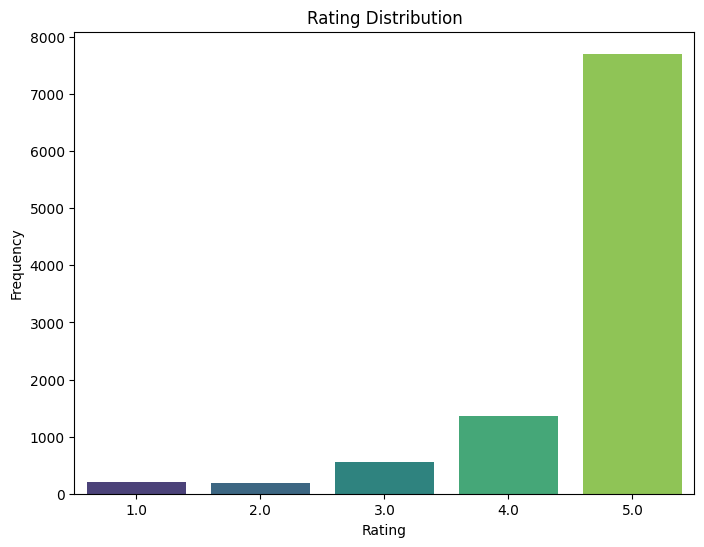

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(x="rating", data=reviews_df, palette="viridis")
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

### Review Distribution Over Time

Can't analyse by time because we have missing timestamps.

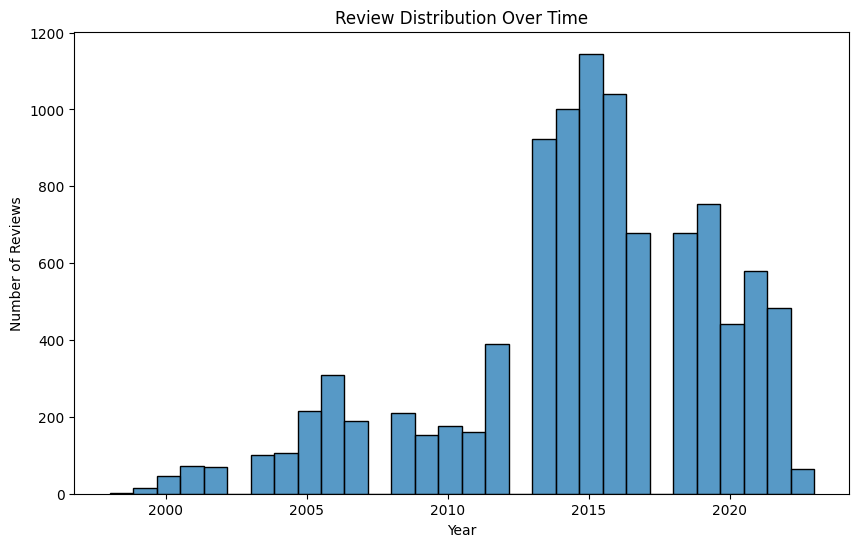

In [39]:
# Convert milliseconds to seconds
reviews_df["timestamp"] = (
    reviews_df["timestamp"] // 1000
)  # Integer division to avoid float values

# Convert to datetime and plot
reviews_df["_timestamp"] = pd.to_datetime(
    reviews_df["timestamp"], unit="s", errors="coerce"
)

# Drop rows with invalid timestamps
valid_reviews_df = reviews_df.dropna(subset=["_timestamp"])

# Extract year
valid_reviews_df["year"] = valid_reviews_df["_timestamp"].dt.year

# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=valid_reviews_df, x="year", bins=30, kde=False)
plt.title("Review Distribution Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.show()

### Price vs Average Product Rating

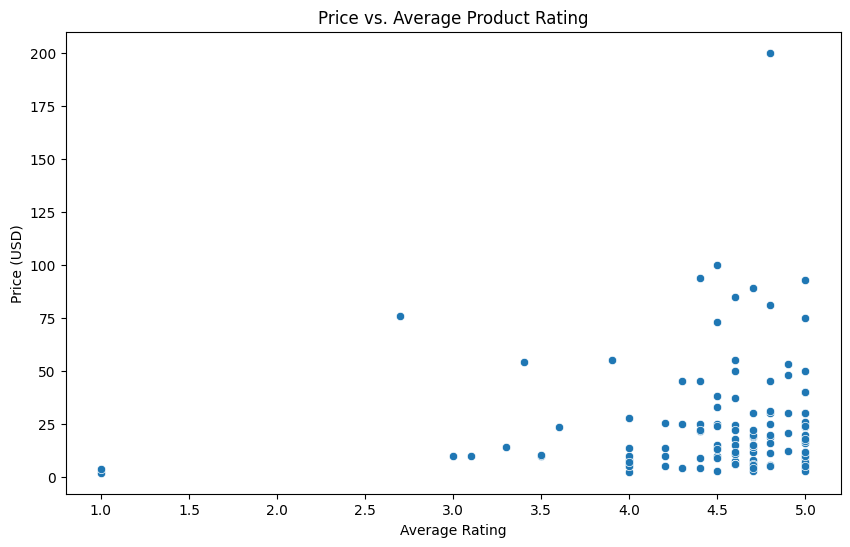

In [40]:
# Convert price to numeric, coerce errors to NaN (non-numeric entries)
meta_df["price"] = pd.to_numeric(
    meta_df["price"].str.replace(r"[^\d.]", "", regex=True), errors="coerce"
)

# Drop rows where price is NaN (invalid price values)
meta_df = meta_df.dropna(subset=["price"])

# Plot Price vs Average Product Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x="average_rating", y="price", data=meta_df)
plt.title("Price vs. Average Product Rating")
plt.xlabel("Average Rating")
plt.ylabel("Price (USD)")
plt.show()

### Top 5 most reviewed products

In [41]:
# Sort by the number of ratings and display the top 5 products
top_reviewed_products = meta_df.sort_values(by="rating_number", ascending=False).head(5)

# Display the top 5 products with relevant information
print("Top 5 Most Reviewed Products:")
display(top_reviewed_products[["title", "rating_number", "average_rating", "price"]])

Top 5 Most Reviewed Products:


,title,rating_number,average_rating,price
319882,Soundtrack,2435,4.8,18.99
576593,Keeper of the Seven Keys - Part 1,1117,4.8,199.95
130863,I Knew You When,644,4.6,7.30
132809,A Hard Day's Night [Original Motion Picture So...,482,4.8,45.00
352504,Quelqu'un M'a Dit,391,4.6,11.90


## Office Products

In [42]:
# File paths
review_file_path = (
    "../data/office_products/Office_Products.jsonl"  # Example path for reviews
)
meta_file_path = (
    "../data/office_products/meta_Office_Products.jsonl"  # Example path for metadata
)

# Load data
reviews_df = load_jsonl(
    review_file_path, num_rows=10000
)  # Load 10k reviews for an initial analysis
meta_df = load_jsonl(meta_file_path)

# Show samples
print("Sample Reviews:")
display(reviews_df.head())

print("\nSample Metadata:")
display(meta_df.head())

Sample Reviews:


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Pretty & I love it!,Lovely ink. Writes well. The right amount of w...,[],B01AHHL4X2,B01MZ3SD2X,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1677939345945,0,True
1,4.0,2 excellent 1 extremely dry (blue),Overall I’m pretty happy with this purchase bc...,[],B08L6H23JZ,B08L6H23JZ,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1677939160682,0,True
2,1.0,I don’t get the reviews. Mine are garbage.,[[VIDEOID:63276c19932aa4f3687042b8b9f8613c]] U...,[],B07JDZ5J46,B07JDZ5J46,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1660188831933,2,True
3,4.0,Ordering Ink online: never a good idea I guess.,"It’s a beautiful color, but even though it had...",[{'small_image_url': 'https://m.media-amazon.c...,B004MNX7EW,B07BR2PBJN,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1659806066713,0,True
4,3.0,Mine are iffy at best.,Idk if I just got a bad batch which is possibl...,[],B019YLRFFS,B097SFY5ZS,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1659799390978,0,True



Sample Metadata:


,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,Office Products,Alliance Rubber 07706 Non-Latex Brites File Ba...,4.5,665,[REUSABLE: These colored rubber bands are stre...,[Alliance Rubber Brites File Bands are durable...,2.68,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'AMUU rubber bands Large 50 Pack 5 ...,Alliance,"[Office Products, Office & School Supplies, Ta...",{'Manufacturer': 'Alliance Rubber Company Inc....,B001S28Q4Q,None,NaN,NaN
1,Office Products,"10 Set Mini Office Stapler with 10# Staples, S...",3.3,186,[Made of high quality metal & plastic for dura...,"[Whether you're a teacher, office worker or st...",13.99,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'Small Mini stapler ', 'url': 'http...",Chneeu,"[Office Products, Office & School Supplies, St...","{'Manufacturer': 'Chnee', 'Brand': 'Chneeu', '...",B07RPQVH21,None,NaN,NaN
2,Office Products,Creanoso Humorous Sayings Bookish Bookmarks fo...,4.6,100,[Creanoso Bookish Humor and Sayings Bookmarks ...,[],9.99,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Cool Space Starry Night Bookmarks'...,Creanoso,"[Office Products, Office & School Supplies, Bo...","{'Manufacturer': 'Creanoso', 'Brand': 'Creanos...",B07J58B87Q,None,NaN,NaN
3,All Electronics,PenPower WorldPen Scan Go | OCR Reading Pen wi...,3.9,296,[TEXT TO SPEECH - Scan printed or digital text...,[],149.0,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'Easy to use', 'url': 'https://www....",PenPower,"[Office Products, Office Electronics, Scanners...","{'Product Dimensions': '0.56""D x 1.24""W x 5.77...",B098NQ685V,None,NaN,NaN
4,Amazon Home,"Assorted Best Selling Birthday Cards, Set of 8...",4.0,11,[],[],None,[{'thumb': 'https://m.media-amazon.com/images/...,[],Apartment 2 Cards,"[Office Products, Office & School Supplies, Pa...",{'Product Dimensions': '5.5 x 4.25 x 0.13 inch...,B00DBSNIC0,None,NaN,NaN


### Statistical Summary

In [43]:
# Descriptive statistics
print("Review Statistics:")
display(reviews_df.describe())

print("\nProduct Metadata Statistics:")
display(meta_df.describe())

Review Statistics:


,rating,timestamp,helpful_vote
count,10000.000000,1.000000e+04,10000.000000
mean,4.438100,1.555365e+12,1.241800
std,1.077165,9.182938e+10,12.541884
min,1.000000,1.033911e+12,0.000000
25%,4.000000,1.500573e+12,0.000000
50%,5.000000,1.577502e+12,0.000000
75%,5.000000,1.623204e+12,0.000000
max,5.000000,1.678996e+12,710.000000



Product Metadata Statistics:


,average_rating,rating_number
count,710503.000000,710503.000000
mean,4.227688,145.412915
std,0.793734,1124.401971
min,1.000000,1.000000
25%,4.000000,3.000000
50%,4.400000,13.000000
75%,4.800000,55.000000
max,5.000000,216285.000000


### Rating distribution

C:\Users\Matheus\AppData\Local\Temp\ipykernel_2100\748774560.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data=reviews_df, palette="viridis")


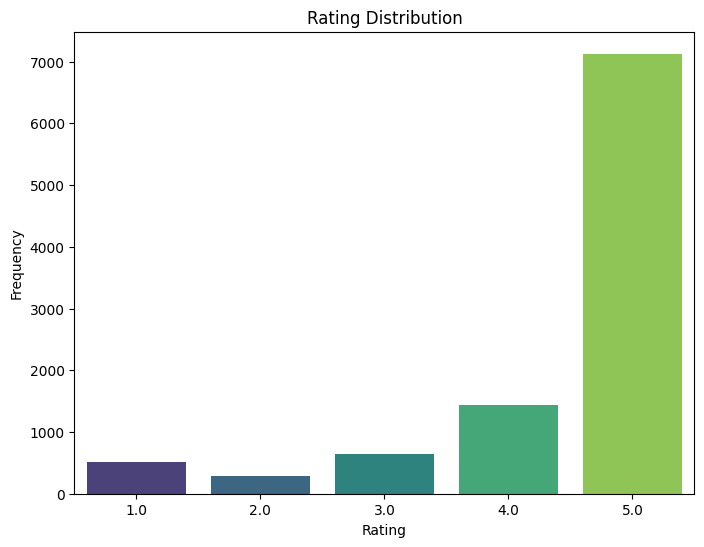

In [44]:
plt.figure(figsize=(8, 6))
sns.countplot(x="rating", data=reviews_df, palette="viridis")
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

### Review Distribution Over Time

Can't analyse by time because we have missing timestamps.

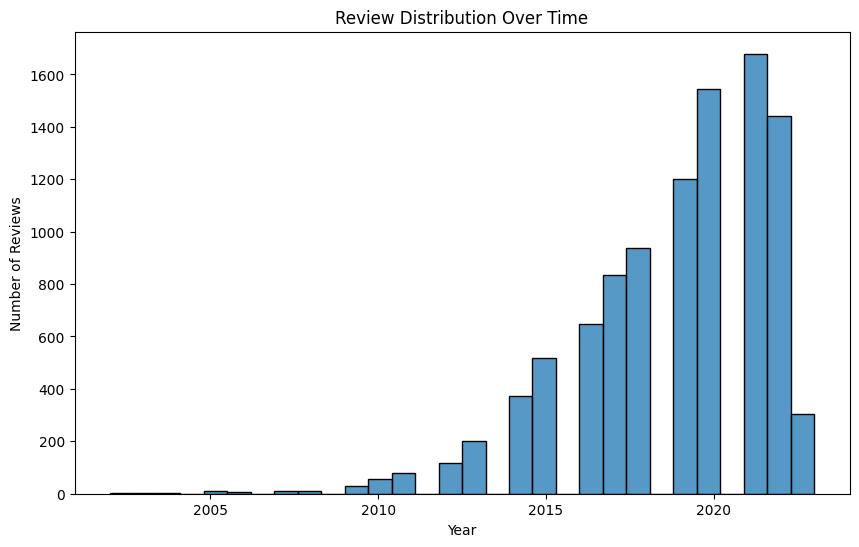

In [45]:
# Convert milliseconds to seconds
reviews_df["timestamp"] = (
    reviews_df["timestamp"] // 1000
)  # Integer division to avoid float values

# Convert to datetime and plot
reviews_df["_timestamp"] = pd.to_datetime(
    reviews_df["timestamp"], unit="s", errors="coerce"
)

# Drop rows with invalid timestamps
valid_reviews_df = reviews_df.dropna(subset=["_timestamp"])

# Extract year
valid_reviews_df["year"] = valid_reviews_df["_timestamp"].dt.year

# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=valid_reviews_df, x="year", bins=30, kde=False)
plt.title("Review Distribution Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.show()

### Price vs Average Product Rating

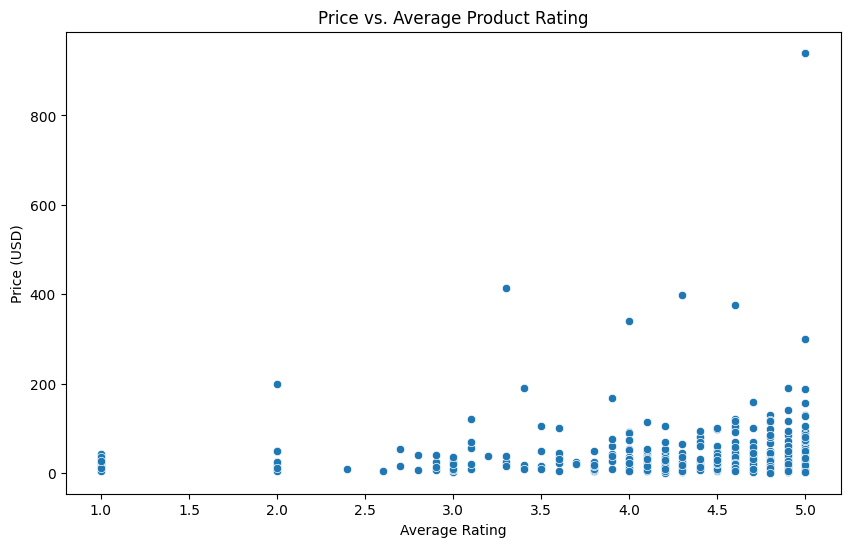

In [46]:
# Convert price to numeric, coerce errors to NaN (non-numeric entries)
meta_df["price"] = pd.to_numeric(
    meta_df["price"].str.replace(r"[^\d.]", "", regex=True), errors="coerce"
)

# Drop rows where price is NaN (invalid price values)
meta_df = meta_df.dropna(subset=["price"])

# Plot Price vs Average Product Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x="average_rating", y="price", data=meta_df)
plt.title("Price vs. Average Product Rating")
plt.xlabel("Average Rating")
plt.ylabel("Price (USD)")
plt.show()

### Top 5 most reviewed products

In [47]:
# Sort by the number of ratings and display the top 5 products
top_reviewed_products = meta_df.sort_values(by="rating_number", ascending=False).head(5)

# Display the top 5 products with relevant information
print("Top 5 Most Reviewed Products:")
top_reviewed_products[["title", "rating_number", "average_rating", "price"]].style

Top 5 Most Reviewed Products:


,title,rating_number,average_rating,price
242815,"Christian Art Gifts Journal w/Scripture Grace Upon Grace John 1:16 Bible Verse Pink Floral Inspirational Wire Bound Spiral w/ 192 Lined Pages,",11838,4.800000,16.950000
33563,"Christian Art Gifts Journal w/Scripture I Can Do All This Through Him Philippians 4:13 Bible Verse Purple Floral 192 Ruled Pages, Large Hardcover Notebook, Wire Bound",11768,4.800000,11.000000
519174,"Christian Art Gifts Journal w/Scripture Desire Of Your Heart Psalm 20:4 Bible Verse Blue Floral 192 Ruled Pages, Large Hardcover Notebook, Wire Bound",7635,4.800000,21.020000
478771,"Christian Art Gifts Journal w/Scripture Serenity Prayer Pink Roses 192 Ruled Pages, Large Hardcover Notebook, Wire Bound",7625,4.800000,8.000000
600808,"Christian Art Gifts Classic Handy-sized Journal Names of Jesus Inspirational Scripture Notebook w/Ribbon, Faux Leather Flexcover 240 Ruled Pages, 5.7"" x 7"", Burgundy",3370,4.800000,20.120000
